# DS-SF-34 | Unit Project | 3 | Machine Learning Modeling and Executive Summary | Starter Code

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.  You will summarize and present your findings and the methods you used.

In [163]:
import os

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn import linear_model, metrics
from sklearn.preprocessing import OneHotEncoder



In [5]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))
df.dropna(inplace = True)

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Part A.  Frequency Table

> ### Question 1.  Create a frequency table for `prestige` and whether an applicant was admitted.

In [139]:
df.isnull().sum()

admit         0
gre           0
gpa           0
prestige      0
prestige_1    0
prestige_2    0
prestige_3    0
prestige_4    0
dtype: int64

In [6]:
# TODO
pd.crosstab(df['prestige'], df['admit'])

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


## Part B.  Feature Engineering

> ### Question 2.  Create a one-hot encoding for `prestige`.

In [7]:
# TODO
prestige_df = pd.get_dummies(df.prestige, prefix = 'prestige')
prestige_df.rename(columns = {'prestige_1.0': 'prestige_1',
    'prestige_2.0': 'prestige_2',
    'prestige_3.0': 'prestige_3',
    'prestige_4.0': 'prestige_4'}, inplace = True)
prestige_df

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0


> ### Question 3.  How many of these binary variables do we need for modeling?

#Answer: TODO

There are 4 categories in prestige. So we only need 3 of them.


> ### Question 4.  Why are we doing this?

Answer: TODO

Because one and only one binary variable will be at 1 while the others will all be at 0. Therefore, if you know any of these n - 1 binary variables, you can derive the remaining one.


> ### Question 5.  Add all these binary variables in the dataset and remove the now redundant `prestige` feature.

In [8]:
# TODO
df = df.join([prestige_df])

In [9]:
df1 = df.drop('prestige', axis = 1)
df1['intercept'] = 1.0
df1

,admit,gre,gpa,prestige_1,prestige_2,prestige_3,prestige_4,intercept
0,0,380.0,3.61,0,0,1,0,1.0
1,1,660.0,3.67,0,0,1,0,1.0
2,1,800.0,4.00,1,0,0,0,1.0
3,1,640.0,3.19,0,0,0,1,1.0
4,0,520.0,2.93,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...
395,0,620.0,4.00,0,1,0,0,1.0
396,0,560.0,3.04,0,0,1,0,1.0
397,0,460.0,2.63,0,1,0,0,1.0
398,0,700.0,3.65,0,1,0,0,1.0


## Part C.  Hand calculating odds ratios

Let's develop our intuition about expected outcomes by hand calculating odds ratios.

> ### Question 6.  Create a frequency table for `prestige = 1` and whether an applicant was admitted.

In [10]:
# TODO

pd.crosstab(df1['prestige_1'], df1['admit'])

admit,0,1
prestige_1,,
0,243,93
1,28,33


> ### Question 7.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools.

In [11]:
# TODO
prob_1 = 33 / 61.
odds_1 = prob_1 / (1 - prob_1)

print (prob_1, odds_1)


0.5409836065573771 1.1785714285714288


> ### Question 8.  Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college.

In [12]:
# TODO
prob_n1 = 93 / 336.
odds_n1 = prob_n1 / (1 - prob_n1)

print (prob_n1, odds_n1)


0.2767857142857143 0.3827160493827161


> ### Question 9.  Finally, what's the odds ratio?

In [13]:
# TODO

odds_1/odds_n1

3.079493087557604

> ### Question 10.  Write this finding in a sentence.

#Answer: TODO

The students atteneded 1st prestige undergraduate schools have 3.08 times higher possibilities to be admiited by the UCLA than the students who didin't attended the 1st prestige undergraduate schools.

> ### Question 11.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools.  Then calculate their odds ratio of being admitted to UCLA.  Finally, write this finding in a sentence.

In [14]:
# TODO
pd.crosstab(df1['prestige_4'], df1['admit'])
prob_4 = 12 / 67.
odds_4 = prob_4 / (1 - prob_4)
prob_n4 = 114 / 330.
odds_n4 = prob_n4 / (1 - prob_n4)
print (odds_4/odds_n4)

0.4133971291866028


Answer: TODO
The students atteneded the least prestigious undergraduate schools only have 41.34% chance to be admiited by the UCLA comparing to the students who didin't attended the the least prestigious undergraduate schools.

## Part D. Analysis using `statsmodels`

> ### Question 12.  Fit a logistic regression model predicting admission into UCLA using `gre`, `gpa`, and the `prestige` of the undergraduate schools.  Use the highest prestige undergraduate schools as your reference point.

In [150]:
cols = df1.columns
cols

Index(['admit', 'gre', 'gpa', 'prestige_1', 'prestige_2', 'prestige_3',
       'prestige_4', 'intercept'],
      dtype='object')

In [126]:
# TODO
train_cols = df1[ ['gre', 'gpa', 'prestige_2', 'prestige_3',
       'prestige_4', 'intercept'] ]
X = df1[ ['gre', 'gpa', 'prestige_2', 'prestige_3',
       'prestige_4'] ] #without intercept
c = df.admit

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 397, dtype: int64

In [17]:
logit = smf.Logit(c, train_cols)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


> ### Question 13.  Print the model's summary results.

In [18]:
# TODO
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Jun 2017   Pseudo R-squ.:                 0.08166
Time:                        21:42:05   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2    -0.6801      0.317     -2.146      0.0

> ### Question 14.  What are the odds ratios of the different features and their 95% confidence intervals?

In [19]:
# TODO
conf = result.conf_int() #confidence intervals
params = result.params 
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                2.5%     97.5%        OR
gre         1.000074  1.004372  1.002221
gpa         1.136120  4.183113  2.180027
prestige_2  0.272168  0.942767  0.506548
prestige_3  0.133377  0.515419  0.262192
prestige_4  0.093329  0.479411  0.211525
intercept   0.002207  0.194440  0.020716


> ### Question 15.  Interpret the odds ratio for `prestige = 2`.

Answer: TODO

We can expect the odds of being admitted to decrease by about 50% if the prestige of a school is 2.

> ### Question 16.  Interpret the odds ratio of `gpa`.

Answer: TODO

We can expect the odds of being admitted to increase by about 218% if the gpa increase 1 unit.


> ### Question 17.  Assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [60]:
predict_X = DataFrame({'gre' : [800,800,800,800],
          'gpa' : [4,4,4,4],
          'prestige_2' : [0,1,0,0],
          'prestige_3' : [0,0,1,0],
          'prestige_4' : [0,0,0,1],
          'intercept' : [1,1,1,1]},
           columns = ['gre', 'gpa', 'prestige_2', 'prestige_3','prestige_4', 'intercept'])

In [140]:
predict_y = result.predict(predict_X)
predict_y = DataFrame(predict_y)
predict_y

,0
0,0.734040
1,0.582995
2,0.419833
3,0.368608


Answer: TODO



## Part E. Moving the model from `statsmodels` to `sklearn`

> ### Question 18.  Let's assume we are satisfied with our model.  Remodel it (same features) using `sklearn`.  When creating the logistic regression model with `LogisticRegression(C = 10 ** 2)`.

In [165]:
# TODO
model = linear_model.LogisticRegression(C = 10 ** 2, class_weight= 'balanced').fit(X, c)
model.score(X, c)

0.63727959697732994

> ### Question 19.  What are the odds ratios for the different variables and how do they compare with the odds ratios calculated with `statsmodels`?

In [166]:
# TODO

print (model.coef_)
print (model.intercept_)

[[ 0.00230605  0.76406987 -0.65343573 -1.31143987 -1.53116987]]
[-3.13235875]


Answer: TODO

In [167]:
# TODO
predict_X1 = predict_X.drop('intercept', axis =1)
predict_y1 = model.predict_proba(predict_X1)
index = ['prestige_1', 'prestige_2', 'prestige_3','prestige_4']
predict_y1 = DataFrame(predict_y1, columns = ['reject','admit'], index = index)
predict_y1


,reject,admit
prestige_1,0.145697,0.854303
prestige_2,0.246880,0.753120
prestige_3,0.387622,0.612378
prestige_4,0.440881,0.559119


Answer: TODO

## Part F.  Executive Summary

> ## Question 21.  Introduction
>
> Write a problem statement for this project.

Answer: TODO

The aim of this data science project is to predict which students would be admitted by the UCLA on their educational characteristics like gre, gpa and alma mater.

> ## Question 22.  Dataset
>
> Write up a description of your data and any cleaning that was completed.

Answer: TODO

The data contains 397 rows and 4 columns (gre, gpa and prestige).

> ## Question 23.  Demo
>
> Provide a table that explains the data by admission status.

In [168]:
#Answer: TODO
pt = df1.pivot_table(index='admit', values= cols, aggfunc='mean').drop ('intercept', axis =1)
pt

,gpa,gre,prestige_1,prestige_2,prestige_3,prestige_4
admit,,,,,,
0,3.347159,573.579336,0.103321,0.350554,0.343173,0.202952
1,3.489206,618.571429,0.261905,0.420635,0.222222,0.095238


> ## Question 24.  Methods
>
> Write up the methods used in your analysis.

Answer: TODO

I used classfication methods to predict the odds that if a student can be admitted be the UCLA. The tool that I used is logistic regression.

> ## Question 25.  Results
>
> Write up your results.

In [171]:
#Answer: TODO
model.score(X, c)

0.63727959697732994

> ## Question 26.  Visuals
>
> Provide a table or visualization of these results.

In [169]:
y_hat = model.predict(X)
pd.crosstab(y_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,172,45
1,99,81


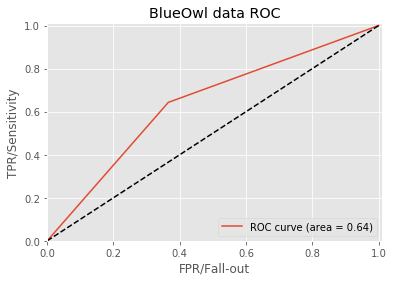

In [170]:
p_hat = model.predict_proba(X).T[1]
fpr, tpr, thresholds = metrics.roc_curve(c, y_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("BlueOwl data ROC")
plt.legend(loc = 'lower right')

Answer: TODO

> ## Question 27.  Discussion
>
> Write up your discussion and future steps.

Answer: TODO

The AUC is still too low. I should use some more techinologies to improve the accuracy. Maybe ensemble methods would be a better classifier. 